## Machine Learning Assignment 4 Coding Part

This Jupyter Notebook contains the coding part of Assignment 4. Please enter your name and student ID here:

- Name: Zewei Zhong (仲泽为)
- StudentID: 122090814

### Overview

In the coding part of Assignment 4, you'll complete the following four tasks:

- **Task 1**: Implement $k$​​​-means.
- **Task 2**: Implement $k$-means++ initialization.
- **Task 3**: Implement a Gaussian Mixture Model.

The following code is incomplete, and you are required to fill in the missing parts. Please feel free to define your own functions or modify the functions given if needed. You may not use off-the-shelf libraries for all three tasks.

### Data Format

We will be working with a toy dataset with features in $\mathbb R^2$. Before you begin, download the following files.
- `train.txt` the training set, containing 4800 samples.
- `dev.txt` the development set, containing 800 samples.

Each line of the files stores a sample in the format `feature_1,feature_2`.

In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from numpy import ndarray
from typing import Tuple, Union, Type, Dict

In [8]:
def read_file(file_path: str, types: Tuple[Type, ...]) -> Tuple[ndarray, ...]:
    """Read a text file with lines containing comma separated numerical values.
    Args:
        file_path (str): The file path.
        types (Tuple[Type]): The types of each column, for example, (float, float, int).
    Returns:
        columns (Tuple[ndarray, ...]): Numpy arrays of shape [N_lines].
    """
    with open(file_path, "r") as f:
        items = [line.strip().split(",") for line in f.readlines()]
        items = [tuple(type(e) for type, e in zip(types, t)) for t in items]
    columns = list(zip(*items))
    return tuple(np.asarray(c) for c in columns)

# Load the dataset from files
train_x1, train_x2 = read_file("C:/Users/Collins/Python/MachineLearning/HW4/train.txt", (float, float))
train_x = np.stack((train_x1, train_x2), axis=1)
dev_x1, dev_x2 = read_file("C:/Users/Collins/Python/MachineLearning/HW4/dev.txt", (float, float))
dev_x = np.stack((dev_x1, dev_x2), axis=1)

### Visualization of the Training Set

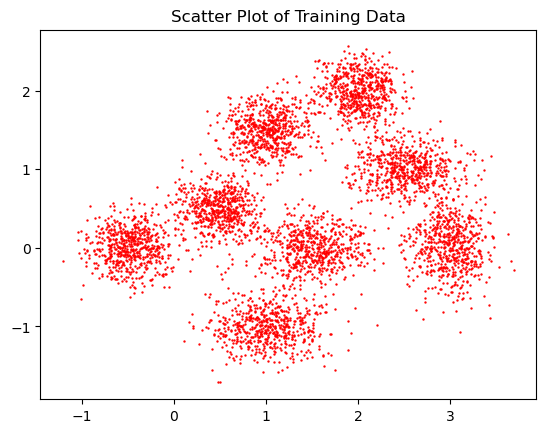

In [9]:
plt.scatter(train_x[:, 0], train_x[:, 1], c="red", s=0.5)
plt.title("Scatter Plot of Training Data")
plt.show()

### Task 1: Implement $k$-means

For $\mathbf x \in \mathbb R^D$ and finite set $\mathcal C \subset \mathbb R^D$ define $d(\mathbf x, \mathcal C) := \min_{\mathbf c \in \mathcal C} \|\mathbf x - \mathbf c\|_2$.

For finite set $\mathcal X \subset \mathbb R^D$ and finite set $\mathcal C \subset \mathbb R^D$ define $\phi(\mathcal X, \mathcal C) := \sum_{\mathbf x \in \mathcal X} d^2(\mathbf x, \mathcal C)$.

Given $\mathcal X = \{\mathbf x_1, \cdots, \mathbf x_N\} \subset \mathbb R^D$, $k$-means optimizes $\mathcal C \subset \mathbb R^D$, where $|\mathcal C| = K$, to minimize the following loss:
$$
\mathcal L(\mathcal C) = \phi(\mathcal X, \mathcal C) = \sum_{\mathbf x \in \mathcal X} \min_{\mathbf c \in \mathcal C} \|\mathbf x - \mathbf c\|_2^2
$$

#### Subtasks
1. Implement the `solve_k_means()` function in the following code block.
2. Plot the loss $\mathcal L$ as a function the number of updates to $\mathcal C$.
3. Generate a scatter plot of the training samples and cluster centers, after $k$-means converges to a **global minimum**.
4. Run $k$-means multiple times. How frequently does the algorithm converge to a global minimum?

In [10]:
def solve_k_means(
    x: ndarray, c: ndarray, *, max_step: int=10000
) -> Tuple[ndarray, ndarray]:
    """K-means solver. Given K initial cluster centers, update c iteratively.
    Note:
        - You may change the function signature.
        - Please try your best to write vectorized code (i.e. avoid for loops over indices).
        - Design some criterion for stopping the iteration.
    Args:
        x (ndarray[float]): shape [N, D], storing N data samples. D is the feature dimension.
        c (ndarray[float]): shape [K, D], storing K initial cluster centers.            K = 8 here
        max_step (int): Maximum number of steps in $k$-means iteration.
    Returns:
        c (ndarray[float]): shape [K, D], updated K cluster centers after iterations.
        index (ndarray[int]): shape [N], the index of the nearest cluster center of
            each sample, in range {0, ..., K - 1}.
    """
    # raise NotImplementedError()
    ##############################################################
    # TODO: Enter your code here                                 #
    K = c.shape[0]
    D = x.shape[1]
    

    loss = []
    # index = [0] * N
    
    iteration = 0
    while (iteration < max_step):
        iteration += 1

    #     distance = 0
    #     cluster_contains_num = [0] * K
    #     cluster_center_total = []
    #     c_new = [None] * K
    #     for _ in range(0,K):
    #         # c_new.append(np.zeros(D).reshape(D))
    #         cluster_center_total.append(np.zeros(D).reshape(1,D))

    #     # first, compute x belongs to which cluster by distance to the centroid
    #     for i, x_ in enumerate(x):       # for each data point
    #         x_i = x_.reshape(1,2)
    #         # x_i.T is a (2, 1) --> column vector
    #         # distance += np.min(np.linalg.norm(x_i - c, axis=1))
    #         index[i] = np.argmin(np.linalg.norm(x_i - c, axis=1))      # distribute its cluster
    #         distance += np.linalg.norm(x_i-c, axis=1)[index[i]]
    #         cluster_contains_num[index[i]] += 1
    #         cluster_center_total[index[i]] += x_i
        
    #     loss.append(np.square(distance))        

    #     # update centroids value
    #     for j in range(0, K):
    #         c_new[j] = (cluster_center_total[j] / cluster_contains_num[j]).reshape(D)

    #     c_new = np.array(c_new)
    #     # if np.linalg.norm(c - c_new) < 10**(-4):
    #     #     break
    # plt.plot([i for i in range(len(loss))], loss)
    # plt.show()
    # return c, index

    #   too slow, give up


        # most coding laws and patterns are found in my test coding, it's hard to explain
        distances = []  # reset
        c_new = np.empty((K,D))

        # change to iterate clusters
        for center in c:
            distance = np.linalg.norm(x - center, axis=1)   # (N)
            distances.append(distance)                      # size K list of (N,) arrays

        distances = np.array(distances)                     # (K, N)
        index = np.argmin(distances, axis=0)                # (N,) array
        l = np.sum(np.square(np.min(distances, axis=0)))    # sum of norm square
        loss.append(l)

        # update centroids value
        for i in range(0, K):
            points = x[index == i]      # directly filter cluster points
            c_new[i] = np.mean(points, axis=0)

        # if np.array_equal(c, c_new):
        if np.allclose(c, c_new, 0.0001):
            break
        
        c = c_new
    plt.plot([i for i in range(len(loss))], loss)
    plt.ylabel("Loss")
    plt.xlabel("Iterations")
    plt.title("Loss when updating c")
    plt.show()

    print("It takes {} iterations to converge.".format(iteration))
    
    return c, index

    ##############################################################

In [11]:
# Random (standard Normal) initialization:
def standard_normal_initialization(K: int) -> ndarray:
    """Standard normal initialization of K cluster centers.
    Args:
        K (int): number of cluster centers.
    Returns:
        c (ndarray): shape [K, 2], K initial cluster centers.
    """
    return np.random.randn(K, 2)

In [ ]:
# Run k-means with random initialization:
# init_c = standard_normal_initialization(8)
# updated_c, index = solve_k_means(train_x, init_c, max_step=1000)

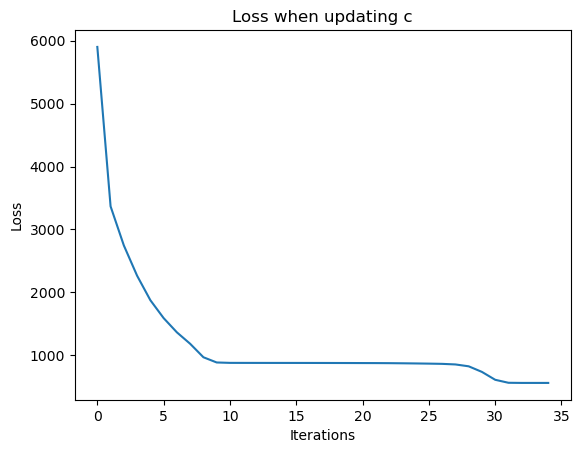

It takes 35 iterations to converge.


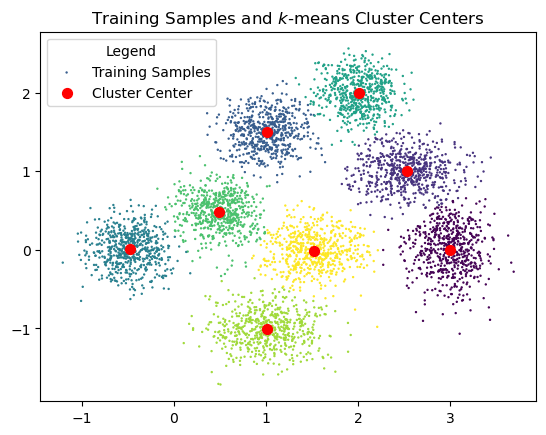

In [52]:
# ### I temporarily put them here for only click mouse once at each trial
init_c = standard_normal_initialization(8)
updated_c, index = solve_k_means(train_x, init_c, max_step=100)

# Plot out the training samples and the cluster centers.
plt.scatter(train_x[:, 0], train_x[:, 1], c=index, s=0.5, label="Training Samples")
plt.scatter(updated_c[:, 0], updated_c[:, 1], c="red", s=50, label="Cluster Center", marker="o")

plt.legend(title="Legend")
plt.title("Training Samples and $k$-means Cluster Centers")
plt.show()

# K means
- Total Trials: `100`
- Nan value: `58`
- Local minimum: `39`
- Global minimum: `3` (the 53rd, 69th, and 91st trial)


### Task 2: Implement $k$-means++

$k$-means is sensitive to its initialization, and a random initialization of $\mathbf c$ often results in convergence to a local minimum. $k$-means++ is an improved initialization method that often leads to better convergence. Read more about it in [Scalable K-Means++](https://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf).

**(Algorithm)** Given $\mathcal X$, $k$-means++ generates a set of $k$ vectors $\mathcal I$ in $\mathbb R^D$ using the following steps:
1. First, randomly pick a sample $\mathbf x$ from $\mathcal X$. And set $\mathcal I := \{\mathbf x\}$.
2. While $|\mathcal I| < k$. Sample $\mathbf x \in \mathcal X$ with probability $p(\mathbf x) := d^2(\mathbf x, \mathcal I) / \phi(\mathcal X, \mathcal I)$. And add the sampled $\mathbf x$ to set $\mathcal I$.

#### Subtasks
1. Implement $k$-means++ initialization algorithm.
2. Compare the loss $\mathcal L$ after convergence with standard normal initialization and $k$-means++ initialization.
3. Compare the convergence speed with random and $k$-means++ initialization.

In [53]:
def k_means_pp_initialization(x: ndarray, K: int) -> ndarray:
    """K-means++ initialization method.
    Args:
        x (ndarray): shape [N, D], storing N data samples. D is the feature dimension.
        K (int): Number of cluster centers.
    Returns:
        c (ndarray): shape [K, D], K initial cluster centers generated by K-means++.
    """
    # raise NotImplementedError()
    ##############################################################
    # TODO: Enter your code here                                 #

    N, D = x.shape
    c = np.empty((K, D))

    # first, randomly pick a sample x and set I := {x}
    c[0] = x[np.random.randint(0, N-1)]
    
    # while |I| < k, sample x with probability
    for k in range(1, K):
        lst_all = []
        for x_i in x:
            lst_distance = []
            for j in range(k):
                # for each centroid 
                lst_distance.append(np.square(np.linalg.norm(x_i - c[j])))
            lst_all.append(min(lst_distance))
        d = np.array(lst_all)
        p = d / np.sum(d)
        
        # add one point into sample
        c[k] = x[np.random.choice(N, p=p)]
    return c
    ##############################################################

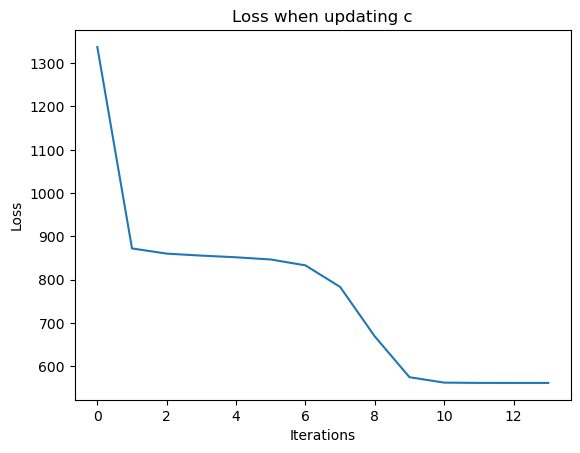

It takes 14 iterations to converge.


In [56]:
# Initialize the cluster centers with k-means++, then do k-means updates.
init_c = k_means_pp_initialization(train_x, 8)
updated_c, index = solve_k_means(train_x, init_c, max_step=1000)

The code cell below is for simplifying manually run codes to do statistic analysis

Also for checking global minimum

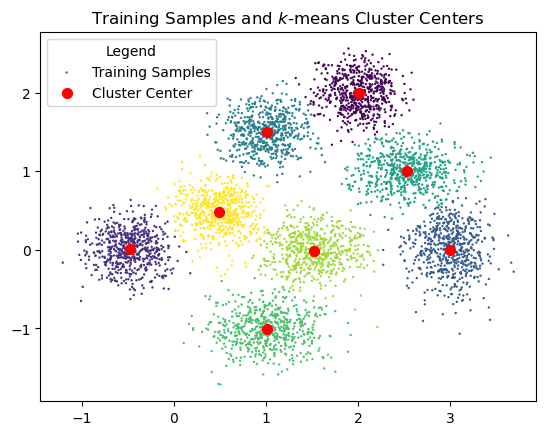

In [57]:
# temporarily put it here for less clicks
# init_c = k_means_pp_initialization(train_x, 8)
# updated_c, index = solve_k_means(train_x, init_c, max_step=1000)

# Plot out the training samples and the cluster centers.
plt.scatter(train_x[:, 0], train_x[:, 1], c=index, s=0.5, label="Training Samples")
plt.scatter(updated_c[:, 0], updated_c[:, 1], c="red", s=50, label="Cluster Center", marker="o")

plt.legend(title="Legend")
plt.title("Training Samples and $k$-means Cluster Centers")
plt.show()

# K++ means
- Total Trials: `50`
- Nan value: `0`
- Local minimum: `22`
- Global minimum: `28`

In [ ]:
# pre-test before task 3
print(index.shape)
index.sum()

### Task 3: Implement a Gaussian Mixture Model

In this task, you will implement the Expectation-Maximization (EM) algorithm for learning a Gaussian Mixture Model (GMM). Our GMM in $\mathbb R^2$ has a density given by:

$$
p(x) = \sum_{k = 1}^K \pi_k \mathcal N(x| \mu_k, \Sigma_k), \quad \mu_k \in \mathbb R^2, \quad \Sigma_k \in \mathbb R^{2 \times 2}
$$

#### Subtasks
1. Implement EM algorithm. Hint: initialize the Gaussian means with $k$-means++ for better convergence.
2. Use the provided `plot_gmm_contour` function to generate a 2D contour plot of the GMM density $p(x)$ after the log likelihood convergence to a global maximum. You may use `gmm_log_prob` to compute log probability of the GMM.
3. Report the log-likelihood on the training set and development set.

In [58]:
def gmm_log_prob(x: ndarray, pi: ndarray, mu: ndarray, sigma: ndarray) -> ndarray:
    """Batched computation of GMM log probability.
    Arg:
        x (ndarray): [..., 2]. Each sample is a vector in R^2.
        pi (ndarray): [K], mixture weights in the GMM, pi.sum() = 1.
        mu (ndarray): [K, 2], means of Gaussian components.
        sigma (ndarray): [K, 2, 2], covariance matrix of Gaussian components.
            Each sigma[k] must be symmetric positive definite.
    Returns:
        log_prob (ndarray): [...]. The log probability of each vector in x.
            Has the same shape as x after removing the last dimension of x.
    """
    mix = torch.distributions.Categorical(probs=torch.as_tensor(pi))
    normals = torch.distributions.MultivariateNormal(
        loc=torch.as_tensor(mu), covariance_matrix=torch.as_tensor(sigma)
    )
    gmm = torch.distributions.MixtureSameFamily(mix, normals)
    return gmm.log_prob(torch.as_tensor(x)).numpy()

In [59]:
from scipy.stats import multivariate_normal

def e_step(x: ndarray, pi: ndarray, miu: ndarray, sigma: ndarray) -> ndarray:
    """
    Args:
        x (ndarray): The data points.       (N, D)
        pi (ndarray): Mixture weights.      (K,)
        mu (ndarray): Means                 (K, D)
        sigma (ndarray): Covariance matrices  (K, [D,D])
    """
    N = x.shape[0]      
    K = pi.shape[0]     

    gamma = np.zeros((N, K)) 
    for i in range(N):
        for k in range(K):
            
            # the numerator
            gamma[i][k] = pi[k] * multivariate_normal.pdf(x[i], mean=miu[k], cov=sigma[k], allow_singular=True)

        # the denominator is the sum according to K, which is axis=0
        gamma[i] /= np.sum(gamma[i])

    return gamma


# def m_step(X: ndarray, index: list, gama: ndarray):
def m_step(X: ndarray, gama: ndarray):
    """
    X: (N, D) each line is a sample of 2-d
    gama: (N, K), gama, (n, k) entry map each data n to cluster k
    """
    N,D = X.shape
    K = gama.shape[1]
    N_ = [0, 0, 0, 0 ,0, 0, 0, 0]
    # miu_new = 8* [np.zeros(2)]        # 这俩不行
    # sigma_new = 8* [np.zeros([2,2])]  # 这俩不行
    miu_new = np.zeros((K, D))
    sigma_new = np.zeros((K, D, D))
    pi_new = np.zeros((K))
    for i, x in enumerate(X):       # 这样遍历应该是每个数据一次
        # i 是 第几个数据
        for j in range(0, 8):
            # j 是第几个 cluster，对应以cluster为标签的 List
            # if index[i] == j:
            N_[j] += gama[i][j]
            miu_new[j] += gama[i][j] * x.T
    
    pi_new = [n/N for n in N_]
    for i in range(0, 8):
        miu_new[i] = miu_new[i] / N_[i]
    
    for i, y in enumerate(X):
        for j in range(0, 8):
            # if index[i] == j:
            sigma_new[j] += gama[i][j] * ( (y - miu_new[j]).reshape(2,1) @ (y - miu_new[j]).reshape(1,2) )

    
    for i in range(0, 8):
        sigma_new[i] = sigma_new[i] / N_[i]

    pi_new = np.array(pi_new)
    miu_new = np.array(miu_new)
    sigma_new = np.array(sigma_new)
    
    ## too slow for looping x




    return (pi_new, miu_new, sigma_new)




## EM-Algorithm
def em(x:ndarray, init_c: ndarray, index: ndarray, max_step: int=1000):
    """
    x:          data, (N, D)
    init_c:     initial clusters' centers, (K, D)
    index:      which cluster each data belongs to. (N,)
                mannually use list(i for i in index) to convert to list
    """
    N, D = x.shape
    K = init_c.shape[0]

    nk_list = [0] * K
    index_list = [i for i in index]
    for i in range(0, K):
        nk_list[i] = index_list.count(i)
    Nk = np.array(nk_list)
    
    miu = init_c        # (K, D)
    sigma = np.zeros((K, D, D))
    for k in range(0, K):
        sigma[k] = np.sum(np.array([a.reshape(D,1) @ a.reshape(1,D) for a in (x[index==k] - miu[k])]), axis=0)
        sigma[k] /= Nk[k]
    pi = Nk / N


    likelihood_list = [-100000000]
    for _ in range(0, max_step):

        gama = e_step(x, pi, miu, sigma)
        pi_new, miu_new, sigma_new = m_step(x, gama)
    
        # if (np.allclose(pi, pi_new) and np.allclose(miu,miu_new) and np.allclose(sigma, sigma_new)):
        likelihood_new = np.sum(gmm_log_prob(x, pi_new, miu_new, sigma_new))
        if (likelihood_new - likelihood_list[-1] < 10**(-5)):
            break
        
        likelihood_list.append(np.sum(gmm_log_prob(x, pi_new, miu_new, sigma_new)))

        pi = pi_new
        miu = miu_new
        sigma = sigma_new
    
    return pi, miu, sigma, likelihood_list[1:]

In [60]:
# raise NotImplementedError()
##############################################################
# TODO: Enter your code here                                 #
# train_x
# init_c
# index
pi, miu, sigma, lst = em(train_x, init_c, index)

##############################################################

In [61]:
def plot_gmm_contour(x: ndarray, pi: ndarray, mu: ndarray, sigma: ndarray) -> None:
    """Generate a contour plot of the GMM probability, overlapped with a scatter plot
        of the samples in x.
    Args:
        x (ndarray): [N, 2].
        pi (ndarray): [K], mixture weights in the GMM, pi.sum() = 1.
        mu (ndarray): [K, 2], means of Gaussian components.
        sigma (ndarray): [K, 2, 2], covariance matrix of Gaussian components.
            Each sigma[k] must be symmetric positive definite.
    """
    grid_1 = np.arange(-1.5, 4, 0.01)  # [Gx]
    grid_2 = np.arange(-2, 3, 0.01)  # [Gy]
    grid_11, grid_22 = np.meshgrid(grid_1, grid_2, indexing="ij")  # [Gx, Gy]
    grid_12 = np.stack([grid_11, grid_22], axis=-1)  # [Gx, Gy, 2]
    
    grid_logp = gmm_log_prob(grid_12, pi, mu, sigma)  # [Gx, Gy, 2]

    # Plot the contour
    plt.figure(figsize=(7, 4))
    plt.contour(grid_1, grid_2, np.exp(grid_logp.transpose()), levels=10, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c="red", s=0.1, label="Training Samples")
    plt.scatter(mu[:, 0], mu[:, 1], c="black", s=50, label="Gaussian Means")
    plt.legend()  # Add legend
    plt.title("Contour Plot of GMM Probability with Training Samples")
    plt.colorbar()
    plt.show()

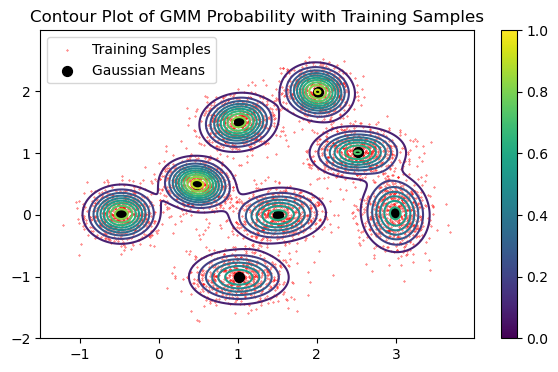

In [62]:
plot_gmm_contour(train_x, pi, miu, sigma)

In [ ]:
## This plot is useless
plt.plot([i for i in range(len(lst))], lst)
plt.ylabel("GMM nagative log likelihood")
plt.xlabel("Iteration")
plt.show()

In [63]:
print("The log-likelihood on the training set is {}".format(np.sum(gmm_log_prob(train_x, pi, miu, sigma))))
print("The log-likelihood on the development set is {}".format(np.sum(gmm_log_prob(dev_x, pi, miu, sigma))))


The log-likelihood on the training set is -9693.226192226924
The log-likelihood on the development set is -1678.0044400735956
